In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import requests
from citipy import citipy 
import time 
from datetime import datetime
from config import weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 
coordinates 

[(-23.487065363934775, 169.80187936136355),
 (87.96439037341611, 170.65972209838884),
 (-37.58273876319798, -73.90487551184441),
 (-52.845438826351455, -68.7344392135625),
 (46.89959429741242, -76.27784313417558),
 (-10.645222653603241, -177.01450281848415),
 (16.319314116684723, -161.78451726409673),
 (50.33568696811898, -132.1453163974709),
 (8.80285144982578, 48.92323506362865),
 (0.5409798597561775, -39.582455537255555),
 (-63.11552968866114, -72.74604247021433),
 (-16.60993906701904, 175.31375045908555),
 (1.1376866884747159, -32.5633770886117),
 (61.31160181216222, 54.421381725589555),
 (-19.08927752210559, -38.90863782636791),
 (-75.66437764985548, 133.64761992942158),
 (-50.14982682737033, 158.1026136367824),
 (-52.96098022898943, -47.174943252265734),
 (-30.983909031946474, -167.61562552119483),
 (-5.040543139640292, 141.17920831670455),
 (-16.23970751514956, -47.89300184626467),
 (62.008726204210205, 151.0875069081094),
 (-84.11556539944979, -12.107555182904434),
 (32.8031794

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities) 

634

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [11]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 35 of Set 25 | vao
Processing Record 36 of Set 25 | pevek
Processing Record 37 of Set 25 | lebu
Processing Record 38 of Set 25 | rio gallegos
Processing Record 39 of Set 25 | maniwaki
Processing Record 40 of Set 25 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 25 | nanakuli
Processing Record 42 of Set 25 | prince rupert
Processing Record 43 of Set 25 | garowe
Processing Record 44 of Set 25 | itarema
Processing Record 45 of Set 25 | ushuaia
Processing Record 46 of Set 25 | isangel
Processing Record 47 of Set 25 | touros
Processing Record 48 of Set 25 | ust-kulom
Processing Record 49 of Set 25 | conceicao da barra
Processing Record 50 of Set 25 | new norfolk
Processing Record 51 of Set 25 | tuatapere
Processing Record 52 of Set 25 | mar del plata
Processing Record 53 of Set 25 | alofi
Processing Record 54 of Set 25 | kiunga
Processing Record 55 of Set 25 | luziania
Processing Record 56 of Set 25 | spornoye
Processing Record 57 of Set 25 | cape town
P

Processing Record 36 of Set 28 | chapais
Processing Record 37 of Set 28 | taoudenni
Processing Record 38 of Set 28 | jaypur
Processing Record 39 of Set 28 | atasu
Processing Record 40 of Set 28 | amsterdam
Processing Record 41 of Set 28 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 28 | fukue
Processing Record 43 of Set 28 | san angelo
Processing Record 44 of Set 28 | kantunilkin
Processing Record 45 of Set 28 | batemans bay
Processing Record 46 of Set 28 | harindanga
Processing Record 47 of Set 28 | lima
Processing Record 48 of Set 28 | oyama
Processing Record 49 of Set 28 | carballo
Processing Record 50 of Set 28 | raga
Processing Record 1 of Set 29 | dudinka
Processing Record 2 of Set 29 | yanan
City not found. Skipping...
Processing Record 3 of Set 29 | college
Processing Record 4 of Set 29 | esperance
Processing Record 5 of Set 29 | ranong
Processing Record 6 of Set 29 | san mateo del mar
Processing Record 7 of Set 29 | galle
Processing Record 8 of Set 29 |

Processing Record 21 of Set 32 | warrnambool
Processing Record 22 of Set 32 | storm lake
Processing Record 23 of Set 32 | labuhan
Processing Record 24 of Set 32 | east london
Processing Record 25 of Set 32 | amderma
City not found. Skipping...
Processing Record 26 of Set 32 | ondorhaan
City not found. Skipping...
Processing Record 27 of Set 32 | porto seguro
Processing Record 28 of Set 32 | vanimo
Processing Record 29 of Set 32 | dong hoi
Processing Record 30 of Set 32 | mys shmidta
City not found. Skipping...
Processing Record 31 of Set 32 | abnub
Processing Record 32 of Set 32 | kavaratti
Processing Record 33 of Set 32 | truro
Processing Record 34 of Set 32 | meadow lake
Processing Record 35 of Set 32 | paamiut
Processing Record 36 of Set 32 | alexandria
Processing Record 37 of Set 32 | havre-saint-pierre
Processing Record 38 of Set 32 | sobolevo
Processing Record 39 of Set 32 | berlevag
Processing Record 40 of Set 32 | santa rosa
Processing Record 41 of Set 32 | suez
Processing Reco

Processing Record 6 of Set 36 | luancheng
Processing Record 7 of Set 36 | kachkanar
Processing Record 8 of Set 36 | muri
Processing Record 9 of Set 36 | general roca
Processing Record 10 of Set 36 | elliot lake
Processing Record 11 of Set 36 | seymchan
Processing Record 12 of Set 36 | kemijarvi
Processing Record 13 of Set 36 | mandalgovi
Processing Record 14 of Set 36 | tiruttani
Processing Record 15 of Set 36 | wulanhaote
City not found. Skipping...
Processing Record 16 of Set 36 | otjimbingwe
Processing Record 17 of Set 36 | sataua
City not found. Skipping...
Processing Record 18 of Set 36 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 36 | murska sobota
Processing Record 20 of Set 36 | dubrovnik
Processing Record 21 of Set 36 | bereda
Processing Record 22 of Set 36 | melville
Processing Record 23 of Set 36 | nemuro
Processing Record 24 of Set 36 | sokolo
Processing Record 25 of Set 36 | pisco
Processing Record 26 of Set 36 | waddan
Processing Record 27 of Set 36

In [16]:
len(city_data) 

580

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.67,167.48,75.20,83,100,10.83,NC,2020-11-25 17:35:11
1,Pevek,69.70,170.31,28.65,96,100,19.08,RU,2020-11-25 17:35:11
2,Lebu,-37.62,-73.65,57.67,67,45,14.65,CL,2020-11-25 17:35:11
3,Rio Gallegos,-51.62,-69.22,60.80,31,40,16.11,AR,2020-11-25 17:32:28
4,Maniwaki,46.38,-75.97,24.80,85,99,4.45,CA,2020-11-25 17:34:29
5,Nanakuli,21.39,-158.15,77.00,83,1,3.36,US,2020-11-25 17:35:11
6,Prince Rupert,54.32,-130.32,41.00,100,90,4.70,CA,2020-11-25 17:35:12
7,Garowe,8.41,48.48,79.27,57,100,20.49,SO,2020-11-25 17:35:12
8,Itarema,-2.92,-39.92,85.80,61,100,19.57,BR,2020-11-25 17:35:12
9,Ushuaia,-54.80,-68.30,51.80,53,75,6.93,AR,2020-11-25 17:31:40


In [19]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'] 
city_data_df = city_data_df[city_data_reordered] 
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2020-11-25 17:35:11,-22.67,167.48,75.20,83,100,10.83
1,Pevek,RU,2020-11-25 17:35:11,69.70,170.31,28.65,96,100,19.08
2,Lebu,CL,2020-11-25 17:35:11,-37.62,-73.65,57.67,67,45,14.65
3,Rio Gallegos,AR,2020-11-25 17:32:28,-51.62,-69.22,60.80,31,40,16.11
4,Maniwaki,CA,2020-11-25 17:34:29,46.38,-75.97,24.80,85,99,4.45
...,...,...,...,...,...,...,...,...,...
575,Northam,GB,2020-11-25 17:36:25,51.03,-4.22,46.99,81,92,3.00
576,Cervo,ES,2020-11-25 17:36:25,43.67,-7.41,53.01,86,100,1.01
577,Lewisporte,CA,2020-11-25 17:36:25,49.25,-55.05,28.40,50,75,11.41
578,Santa Cruz,BO,2020-11-25 17:34:19,-17.80,-63.17,95.00,50,75,20.80


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [21]:
#6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"] 

In [23]:
# Get today's date in seconds.
today = time.time()
today 

1606350494.6439738

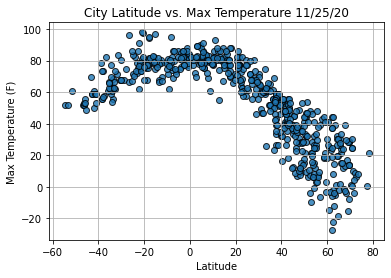

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show() 

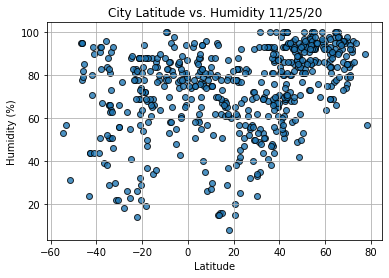

In [25]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show() 

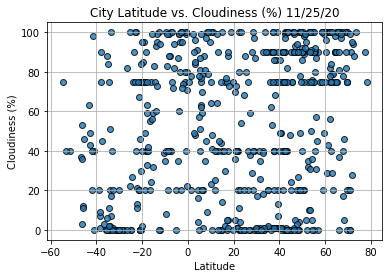

In [26]:
#6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show() 

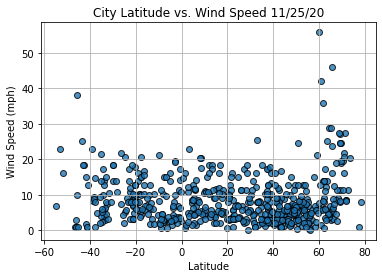

In [27]:
#6.3.4
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show() 